In [92]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [93]:
diabetes_bunch = load_diabetes()

diabetes_progression = pd.DataFrame(diabetes_bunch.target, columns = ["disease progression"])
diabetes_df = pd.DataFrame(diabetes_bunch.data, columns=diabetes_bunch.feature_names)
diabetes_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [94]:
diabetes_progression.head(5)

,disease progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [95]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [96]:
diabetes_df.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

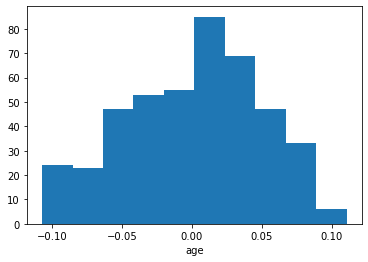

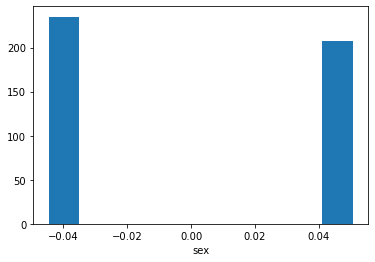

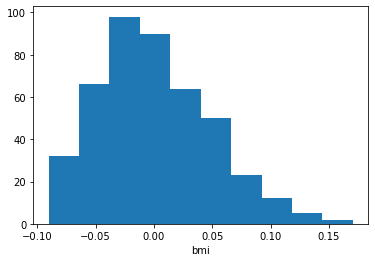

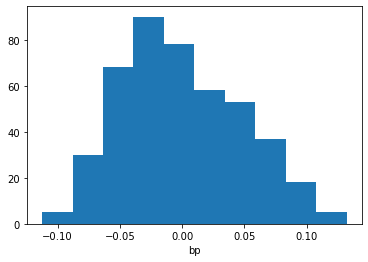

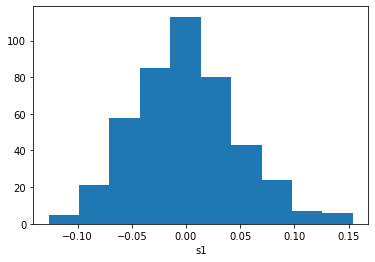

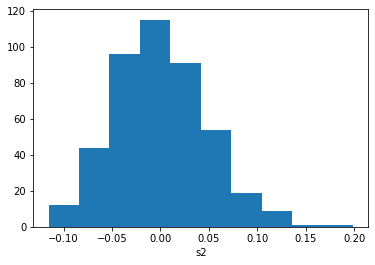

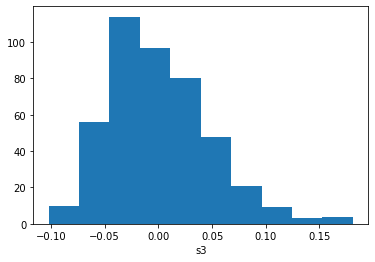

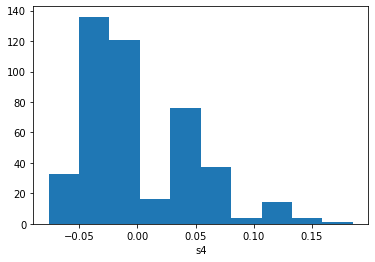

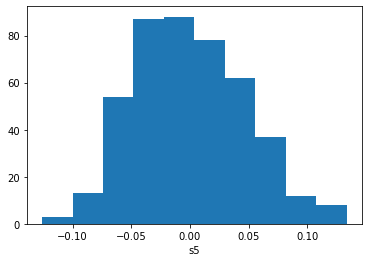

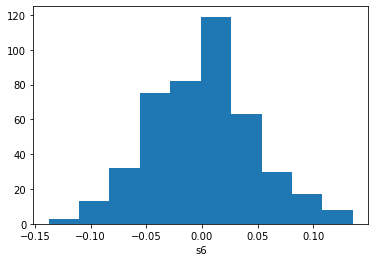

In [97]:
for column in range(0, len(diabetes_df.columns)):
    plt.figure(column)
    plt.hist(diabetes_df.iloc[:,column])
    plt.xlabel(diabetes_df.columns[column])

In [98]:
diabetes_test, diabetes_train = train_test_split(diabetes_df, test_size = .2)
progression_test, progression_train = train_test_split(diabetes_progression, test_size = .2)

<AxesSubplot:>

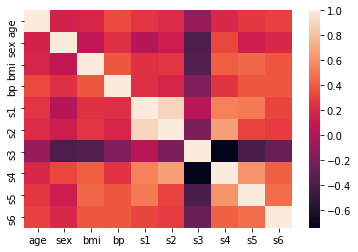

In [99]:
seaborn.heatmap(diabetes_df.corr())

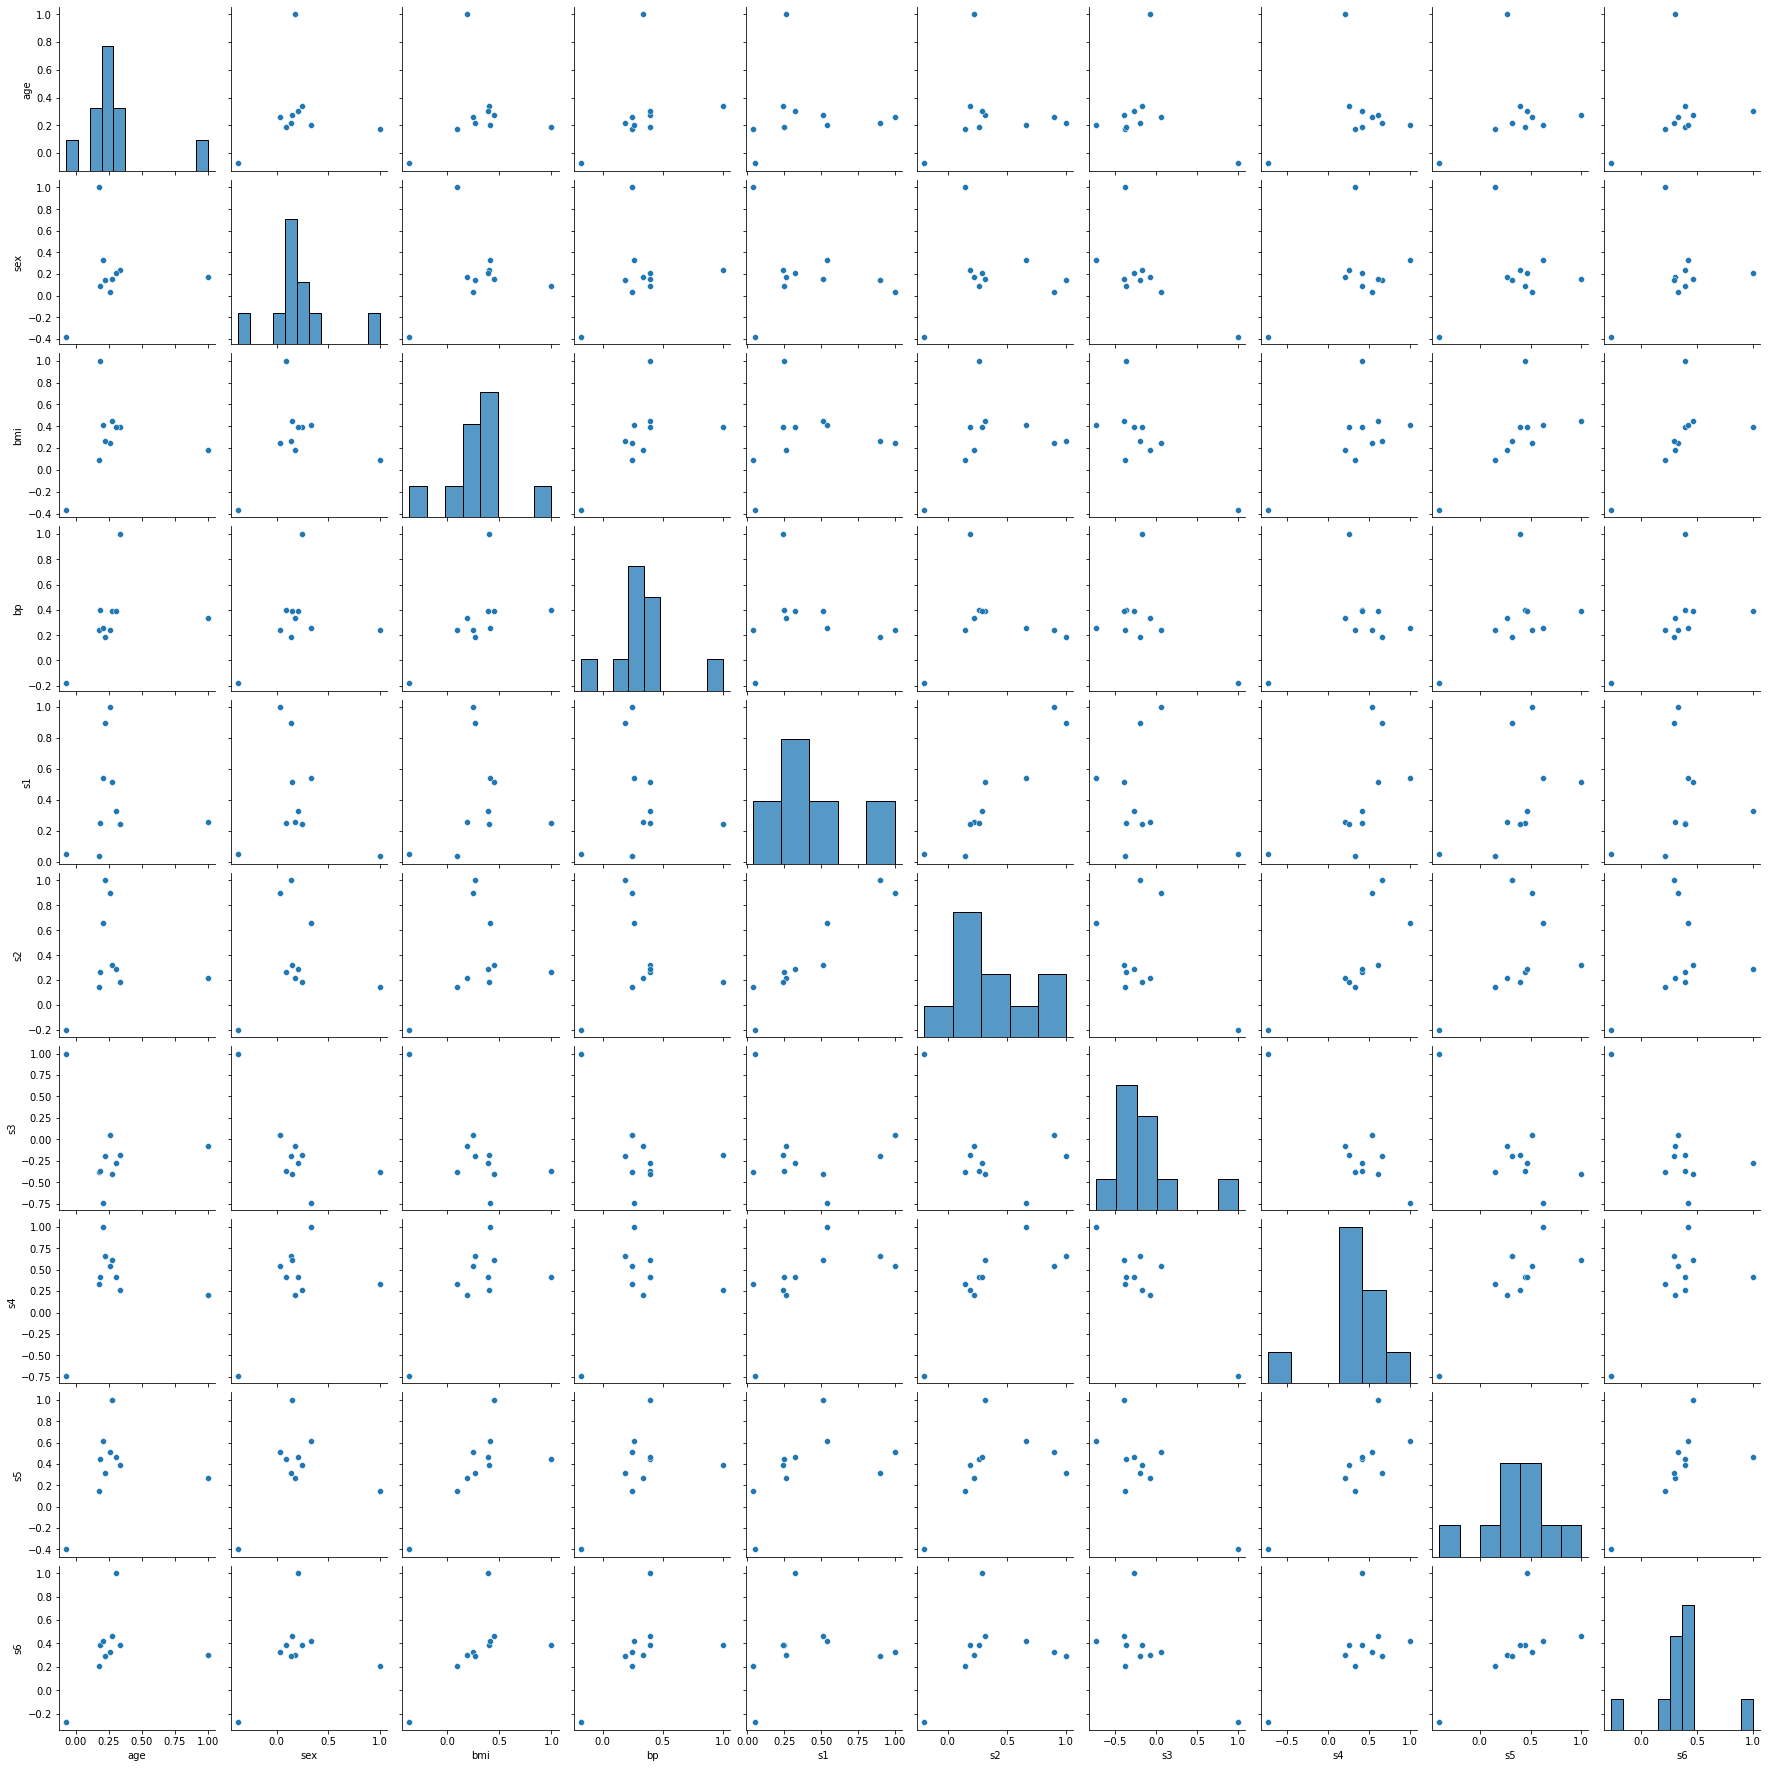

In [100]:
seaborn.pairplot(diabetes_df.corr())

In [101]:
linear_model = LinearRegression(fit_intercept = True).fit(diabetes_train, progression_train)

In [102]:
tree_model = DecisionTreeRegressor().fit(diabetes_train,progression_train)

In [103]:
forest_model = RandomForestRegressor().fit(diabetes_train,progression_train)

<ipython-input-103-33136bde5fe9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model = RandomForestRegressor().fit(diabetes_train,progression_train)


In [104]:
tree_prediction = tree_model.predict(diabetes_test)
forest_prediction = forest_model.predict(diabetes_test)

In [114]:
def printResults(model_name, model):
    prediction = model.predict(diabetes_test)
    print(model_name)
    print("R Squared: ", model.score(diabetes_test, progression_test))
    print("RMSE: ", mean_squared_error(prediction, progression_test, squared = False))
    print("")

In [115]:
printResults("Linear", linear_model)
printResults("Tree", tree_model)
printResults("Forest", forest_model)

Linear
R Squared:  -0.11751328523374771
RMSE:  81.1278802157555

Tree
R Squared:  -1.1169539081055149
RMSE:  111.66047789144633

Forest
R Squared:  -0.1151535255970737
RMSE:  81.0421794595757

